In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1_C1 = pd.read_csv("EIS_state_I_25C01.csv",sep=',', header=0, index_col=False)
df1_C1.head(5)

df_C2 = pd.read_csv("EIS_state_I_25C02.csv",sep=',', header=0, index_col=False)
df_C3 = pd.read_csv("EIS_state_I_25C03.csv",sep=',', header=0, index_col=False)
df_C4 = pd.read_csv("EIS_state_I_25C04.csv",sep=',', header=0, index_col=False)
df_C5 = pd.read_csv("EIS_state_I_25C05.csv",sep=',', header=0, index_col=False)
df_C6 = pd.read_csv("EIS_state_I_25C06.csv",sep=',', header=0, index_col=False)

## Ciclos dentro de un archivo

* Cada batería ha sido cargada y descargada en un total de 350 ciclos. 
* La información de estos 350 ciclos está plasmada en el archivo de una única batería.
* Para cada ciclo hay un total de **60** muestras. Es decir, se tiene un total de **21.000** filas.

In [61]:
# Funciones para extraer resistencias (R) y reactancias (X).

def cycle_resistances(dataFrame):
    # Input: Txt de la base de datos de EIS Cambridge como DataFrame
    # Output: Lista con 350 listas. Cada una son los valores de resistencia
    #         de un mismo ciclo

    resistance_arrays = []
    for i in range(1,351):
        df1 = dataFrame[dataFrame["cycle number"]==i].copy(deep=True)
        reZ = df1["Re(Z)/Ohm"].to_list()
        resistance_arrays.append(reZ)
    return resistance_arrays

def cycle_reactances(dataFrame):
    # Input: Txt de la base de datos de EIS Cambridge como DataFrame
    # Output: Lista con 350 listas. Cada una son los valores de reactancia
    #         de un mismo ciclo
    reactance_arrays = []
    for i in range(1,351):
        df1 = dataFrame[dataFrame["cycle number"]==i].copy(deep=True)
        imZ = df1["-Im(Z)/Ohm"].to_list()
        reactance_arrays.append(imZ)
    return reactance_arrays

Text(0.5, 0, 'Re (Z)')

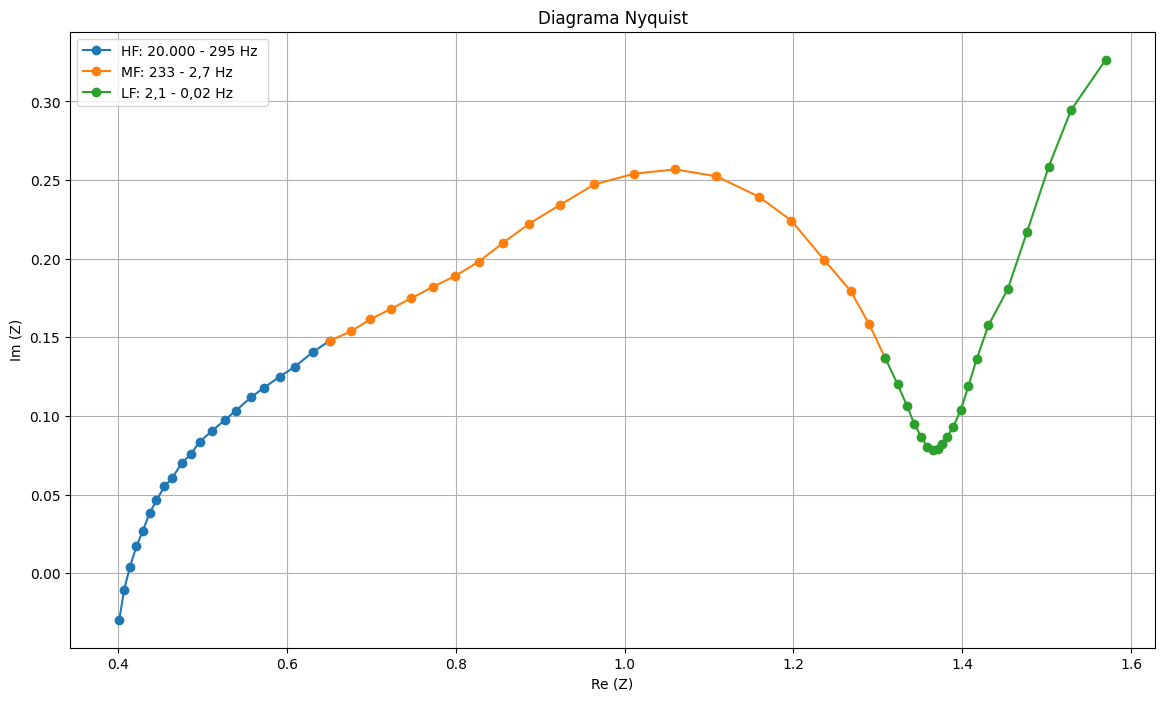

In [37]:
reZ = df1_C1["Re(Z)/Ohm"].to_list()
imZ = df1_C1["-Im(Z)/Ohm"].to_list()

plt.figure(figsize=(14,8))

plt.plot(reZ[0:20+1],imZ[0:20+1], marker='o', label="HF: 20.000 - 295 Hz ")
plt.plot(reZ[21-1:40+1],imZ[21-1:40+1], marker='o', label="MF: 233 - 2,7 Hz ")
plt.plot(reZ[41-1:60],imZ[41-1:60], marker='o', label="LF: 2,1 - 0,02 Hz ")
plt.legend()
plt.grid()
plt.title("Diagrama Nyquist")
plt.ylabel("Im (Z)")
plt.xlabel("Re (Z)")


In [78]:
# Data Bateria 1
resistencias_C1 = cycle_resistances(df1_C1)
reactancias_C1 = cycle_reactances(df1_C1)
# Data Bateria 2
resistencias_C2 = cycle_resistances(df_C2)
reactancias_C2 = cycle_reactances(df_C2)
# Data Bateria 3
resistencias_C3 = cycle_resistances(df_C3)
reactancias_C3 = cycle_reactances(df_C3)
# Data Bateria4
resistencias_C4 = cycle_resistances(df_C4)
reactancias_C4 = cycle_reactances(df_C4)
# Dataa Bateria 5
resistencias_C5 = cycle_resistances(df_C5)
reactancias_C5 = cycle_reactances(df_C5)
# Data Bateria 6
resistencias_C6 = cycle_resistances(df_C6)
reactancias_C6 = cycle_reactances(df_C6)

(-0.2, 0.6)

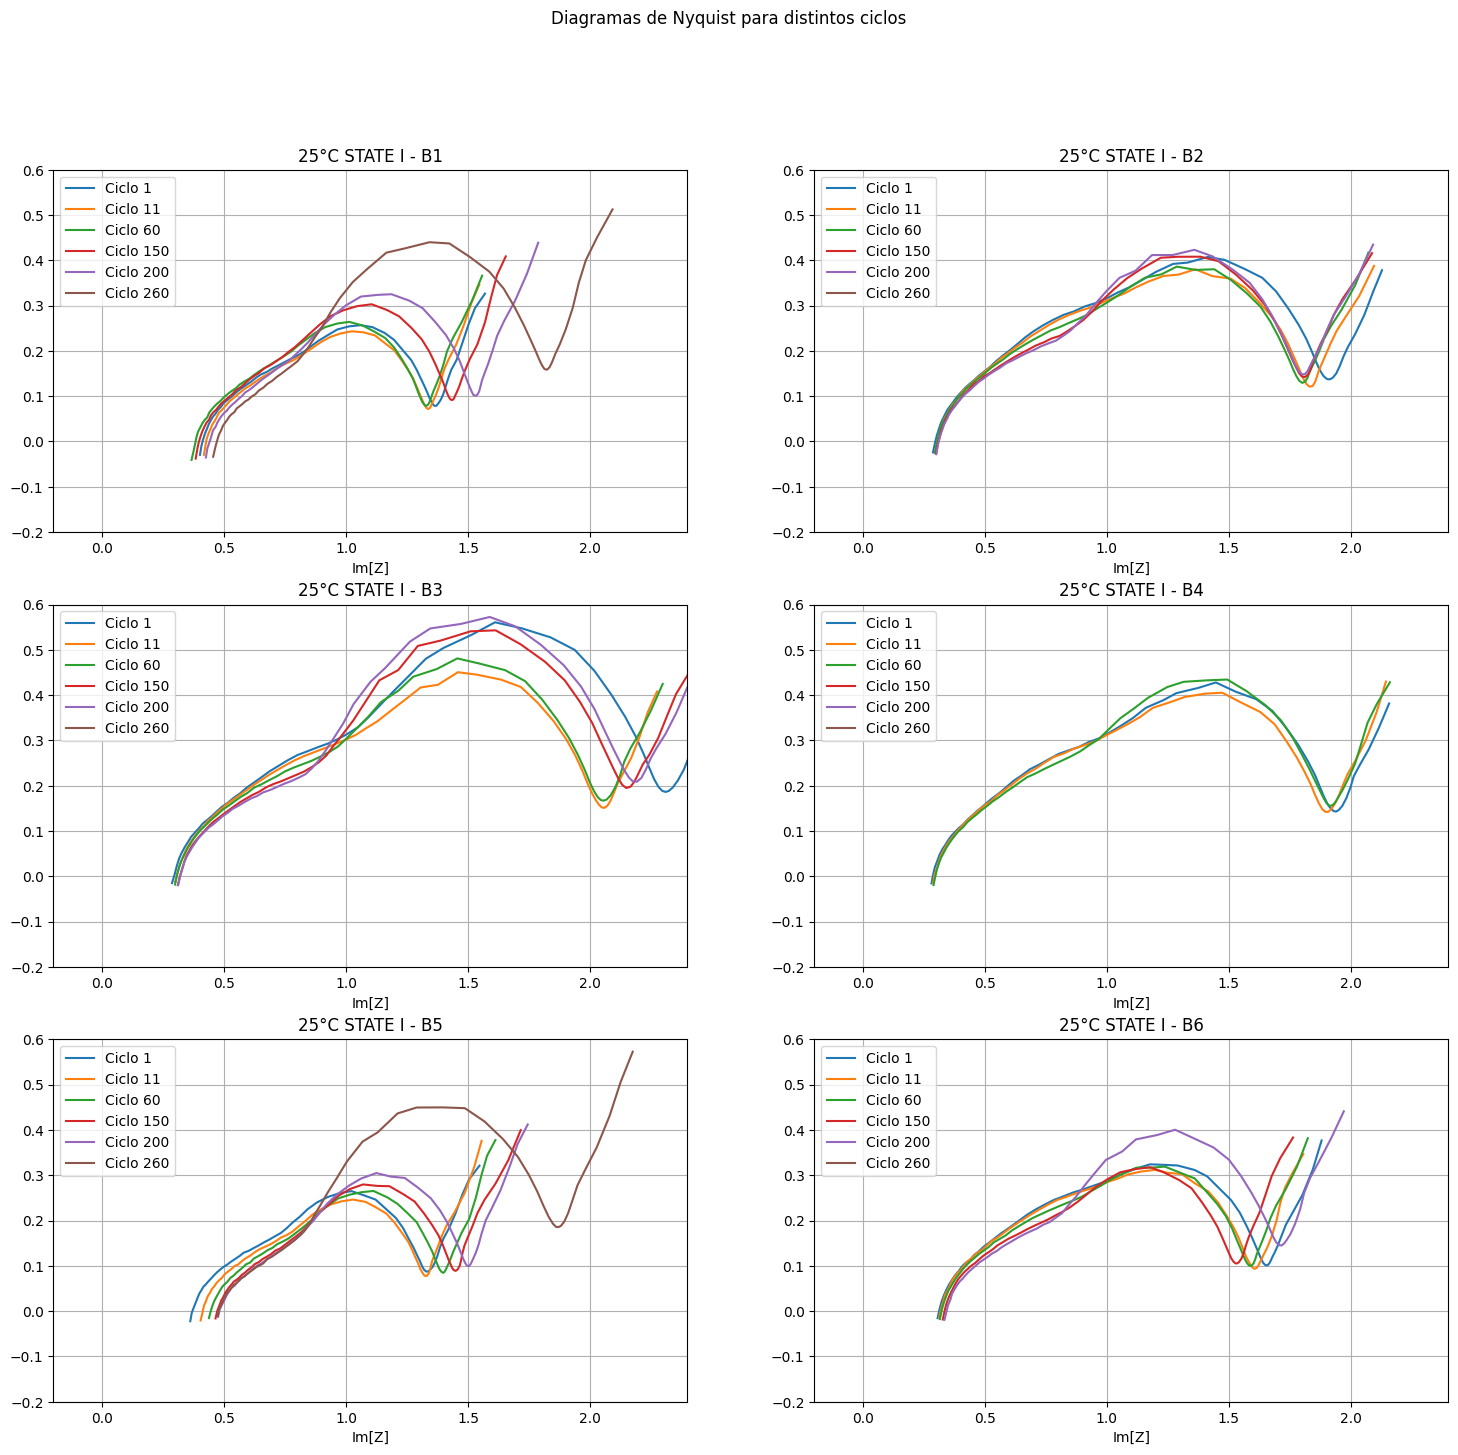

In [104]:
fig, axis = plt.subplots(nrows=3, ncols=2 ,figsize=(18,16))
fig.suptitle("Diagramas de Nyquist para distintos ciclos")

axis[0,0].plot(resistencias_C1[0], reactancias_C1[0], label="Ciclo 1")
axis[0,0].plot(resistencias_C1[10], reactancias_C1[10], label="Ciclo 11")
axis[0,0].plot(resistencias_C1[61], reactancias_C1[61], label="Ciclo 60")
axis[0,0].plot(resistencias_C1[151], reactancias_C1[151], label="Ciclo 150")
axis[0,0].plot(resistencias_C1[201], reactancias_C1[201], label="Ciclo 200")
axis[0,0].plot(resistencias_C1[261], reactancias_C1[261], label="Ciclo 260")
axis[0,0].legend()
axis[0,0].grid()
axis[0,0].set_title("25°C STATE I - B1")
axis[0,0].set_xlabel("Re[Z]")
axis[0,0].set_xlabel("Im[Z]")
axis[0,0].set_xlim(left= -0.2, right=2.4)
axis[0,0].set_ylim(bottom= -0.2, top=0.6)
axis[0,0].set_ylim()

axis[0,1].plot(resistencias_C2[0], reactancias_C2[0], label="Ciclo 1")
axis[0,1].plot(resistencias_C2[10], reactancias_C2[10], label="Ciclo 11")
axis[0,1].plot(resistencias_C2[61], reactancias_C2[61], label="Ciclo 60")
axis[0,1].plot(resistencias_C2[151], reactancias_C2[151], label="Ciclo 150")
axis[0,1].plot(resistencias_C2[201], reactancias_C2[201], label="Ciclo 200")
axis[0,1].plot(resistencias_C2[261], reactancias_C2[261], label="Ciclo 260")
axis[0,1].legend()
axis[0,1].grid()
axis[0,1].set_title("25°C STATE I - B2")
axis[0,1].set_xlabel("Re[Z]")
axis[0,1].set_xlabel("Im[Z]")
axis[0,1].set_xlim(left= -0.2, right=2.4)
axis[0,1].set_ylim(bottom= -0.2, top=0.6)

axis[1,0].plot(resistencias_C3[0], reactancias_C3[0], label="Ciclo 1")
axis[1,0].plot(resistencias_C3[10], reactancias_C3[10], label="Ciclo 11")
axis[1,0].plot(resistencias_C3[61], reactancias_C3[61], label="Ciclo 60")
axis[1,0].plot(resistencias_C3[151], reactancias_C3[151], label="Ciclo 150")
axis[1,0].plot(resistencias_C3[201], reactancias_C3[201], label="Ciclo 200")
axis[1,0].plot(resistencias_C3[261], reactancias_C3[261], label="Ciclo 260")
axis[1,0].legend()
axis[1,0].grid()
axis[1,0].set_title("25°C STATE I - B3")
axis[1,0].set_xlabel("Re[Z]")
axis[1,0].set_xlabel("Im[Z]")
axis[1,0].set_xlim(left= -0.2, right=2.4)
axis[1,0].set_ylim(bottom= -0.2, top=0.6)

axis[1,1].plot(resistencias_C4[0], reactancias_C4[0], label="Ciclo 1")
axis[1,1].plot(resistencias_C4[10], reactancias_C4[10], label="Ciclo 11")
axis[1,1].plot(resistencias_C4[61], reactancias_C4[61], label="Ciclo 60")
axis[1,1].plot(resistencias_C4[151], reactancias_C4[151], label="Ciclo 150")
axis[1,1].plot(resistencias_C4[201], reactancias_C4[201], label="Ciclo 200")
axis[1,1].plot(resistencias_C4[261], reactancias_C4[261], label="Ciclo 260")
axis[1,1].legend()
axis[1,1].grid()
axis[1,1].set_title("25°C STATE I - B4")
axis[1,1].set_xlabel("Re[Z]")
axis[1,1].set_xlabel("Im[Z]")
axis[1,1].set_xlim(left= -0.2, right=2.4)
axis[1,1].set_ylim(bottom= -0.2, top=0.6)

axis[2,0].plot(resistencias_C5[0], reactancias_C5[0], label="Ciclo 1")
axis[2,0].plot(resistencias_C5[10], reactancias_C5[10], label="Ciclo 11")
axis[2,0].plot(resistencias_C5[61], reactancias_C5[61], label="Ciclo 60")
axis[2,0].plot(resistencias_C5[151], reactancias_C5[151], label="Ciclo 150")
axis[2,0].plot(resistencias_C5[201], reactancias_C5[201], label="Ciclo 200")
axis[2,0].plot(resistencias_C5[261], reactancias_C5[261], label="Ciclo 260")
axis[2,0].legend()
axis[2,0].grid()
axis[2,0].set_title("25°C STATE I - B5")
axis[2,0].set_xlabel("Re[Z]")
axis[2,0].set_xlabel("Im[Z]")
axis[2,0].set_xlim(left= -0.2, right=2.4)
axis[2,0].set_ylim(bottom= -0.2, top=0.6)

axis[2,1].plot(resistencias_C6[0], reactancias_C6[0], label="Ciclo 1")
axis[2,1].plot(resistencias_C6[10], reactancias_C6[10], label="Ciclo 11")
axis[2,1].plot(resistencias_C6[61], reactancias_C6[61], label="Ciclo 60")
axis[2,1].plot(resistencias_C6[151], reactancias_C6[151], label="Ciclo 150")
axis[2,1].plot(resistencias_C6[201], reactancias_C6[201], label="Ciclo 200")
axis[2,1].plot(resistencias_C6[261], reactancias_C6[261], label="Ciclo 260")
axis[2,1].legend()
axis[2,1].grid()
axis[2,1].set_title("25°C STATE I - B6")
axis[2,1].set_xlabel("Re[Z]")
axis[2,1].set_xlabel("Im[Z]")
axis[2,1].set_xlim(left= -0.2, right=2.4)
axis[2,1].set_ylim(bottom= -0.2, top=0.6)

In [67]:
resistencias_C1[10]

[0.41731,
 0.42333,
 0.42837,
 0.43624,
 0.44448,
 0.45211,
 0.46224,
 0.47074,
 0.47933,
 0.48976,
 0.50083,
 0.51259,
 0.52489,
 0.53867,
 0.55341,
 0.5688,
 0.58706,
 0.60455,
 0.62296,
 0.64253,
 0.66358,
 0.68557,
 0.70863,
 0.73162,
 0.75616,
 0.78285,
 0.80809,
 0.83529,
 0.86439,
 0.89867,
 0.93496,
 0.97857,
 1.02325,
 1.0702,
 1.119,
 1.15878,
 1.19778,
 1.22745,
 1.25489,
 1.27544,
 1.28955,
 1.30185,
 1.31129,
 1.3187,
 1.32508,
 1.33078,
 1.33674,
 1.34294,
 1.34846,
 1.35375,
 1.35927,
 1.36821,
 1.37894,
 1.39039,
 1.40353,
 1.42191,
 1.45143,
 1.48356,
 1.51333,
 1.54643]

In [59]:
for i in range(0,10,2):
    print(i)

0
2
4
6
8
